In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize,sent_tokenize
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
nltk.download('stopwords')
nltk.download('punkt')
from gensim.models import Word2Vec
from keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten
from keras.models import Sequential, load_model, model_from_config
import keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import cohen_kappa_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# New Section

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle competitions download -c asap-aes

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
df=pd.read_csv('training_set_rel3.csv',sep=None, encoding='ISO-8859-1');
df.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(12978, 28)

In [ ]:
df = df[df['domain1_score'].notna()]
df = df[df['essay_id'].notna()]
df = df[df['essay_set'].notna()]
df = df[df['essay'].notna()]
df.dropna(axis=1,inplace=True)
#df.drop(columns=['rater1_domain1','rater2_domain1'],inplace=True,axis=1)'''
df.head()
df.shape

(12977, 6)

In [ ]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0


In [ ]:
df.drop(columns=['rater1_domain1','rater2_domain1'],inplace=True,axis=1)
df.head()

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0


In [ ]:
df.shape

(12977, 4)

In [ ]:
df.head()

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0


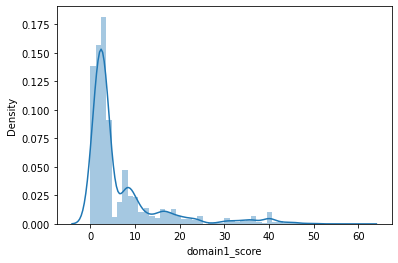

In [ ]:
#Check Skewness
sns.distplot(df['domain1_score'])

In [ ]:

min_range = [2,1,0,0,0,0,0,0]
max_range = [12,6,3,3,4,4,30,60]

def normalize(x,mi,ma):
    x = (x-mi)/(ma-mi)
    return round(x*10)

df['final_score']=df.apply(lambda x:normalize(x['domain1_score'],min_range[x['essay_set']-1],max_range[x['essay_set']-1]),axis=1)

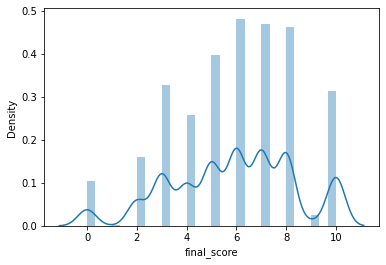

In [ ]:
sns.distplot(df['final_score'])

In [ ]:
df.shape
df = df[df['final_score'].notna()]
df.shape

(12977, 5)

In [ ]:
df.drop('domain1_score',axis=1,inplace=True)

In [ ]:
df.head()

,essay_id,essay_set,essay,final_score
0,1,1,"Dear local newspaper, I think effects computer...",6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",8
4,5,1,"Dear @LOCATION1, I know having computers has a...",6


In [ ]:
#Make Dataset
y = df['final_score']
df.drop('final_score',inplace=True,axis=1)
X=df

In [ ]:
X.dropna()

,essay_id,essay_set,essay
0,1,1,"Dear local newspaper, I think effects computer..."
1,2,1,Dear I believe that using computers will benef...
2,3,1,"Dear, More and more people use computers, but ..."
3,4,1,"Dear Local Newspaper, I have found that many e..."
4,5,1,Dear I know having computers has a positive ef...
...,...,...,...
12973,21626,8,In most stories mothers and daughters are eith...
12974,21628,8,I never understood the meaning laughter is the...
12975,21629,8,"When you laugh, is out of habit, or is cause? ..."
12976,21630,8,"Trippin' on fences I am years young, and in th..."


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.dropna()

,essay_id,essay_set,essay
1395,1400,1,Would you like to be on the computer and throw...
9755,15703,6,While attempting to allow dirigibles to dock o...
8800,13546,5,Narciso Rodriguez set a strong mood of happien...
6641,10200,4,The author of the story concludes the text wit...
10164,16112,6,When attempting to allow dirigibles to dock on...
...,...,...,...
11965,19247,7,In my opinion being patient is when your waiti...
5191,7591,3,"In the story, Do not exceed postal speed limi..."
5390,8944,4,"The author ends the story with that paragraph,..."
860,863,1,Dear are very dangerous to the modern day soci...


In [ ]:
X_train.shape

(9083, 3)

In [ ]:

#Preprocessing
train_e = X_train['essay'].tolist()
test_e = X_test['essay'].tolist()

train_sents=[]
test_sents=[]

def clean_essay(essay):
    x=[]
    for i in essay.split():
        if i.startswith("@"):
            continue
        else:
            x.append(i)
    return ' '.join(x)
df['essay'] = df['essay'].apply(lambda x:clean_essay(x))

stop_words = set(stopwords.words('english')) 
def sent2word(x):
    x=re.sub("[^A-Za-z]"," ",x)
    x.lower()
    filtered_sentence = [] 
    words=x.split()
    for w in words:
        if w not in stop_words: 
            filtered_sentence.append(w)
    return filtered_sentence

def essay2word(essay):
    essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw = tokenizer.tokenize(essay)
    final_words=[]
    for i in raw:
        if(len(i)>0):
            final_words.append(sent2word(i))
    return final_words

for i in train_e:
    train_sents+=essay2word(i)

for i in test_e:
    test_sents+=essay2word(i)

In [ ]:
len(train_sents)
train_sents[0]

['Would', 'like', 'computer', 'NUM', 'throw', 'away', 'life']

In [ ]:
#Preparing WORD2VEC and LSTM Model, training & testing, and graph

In [ ]:
def get_model():
    model = Sequential()
    model.add(LSTM(300, dropout=0.4, recurrent_dropout=0.4, input_shape=[1, 300], return_sequences=True))
    model.add(LSTM(64, recurrent_dropout=0.4))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
    model.summary()
    return model

In [ ]:
#Training Word2Vec model
#synonyms
num_features = 300 
min_word_count = 40
num_workers = 4
context = 10
downsampling = 1e-3

model = Word2Vec(train_sents, 
                 workers=num_workers, 
                 size=num_features, 
                 min_count = min_word_count, 
                 window = context, 
                 sample = downsampling)

model.init_sims(replace=True)
model.wv.save_word2vec_format('word2vecmodel.bin', binary=True)

In [ ]:
#average of all word vectors in  para
def makeVec(words, model, num_features):
    vec = np.zeros((num_features,),dtype="float32")
    noOfWords = 0.
    index2word_set = set(model.wv.index2word)
    for i in words:
        if i in index2word_set:
            noOfWords += 1
            vec = np.add(vec,model[i])        
    vec = np.divide(vec,noOfWords)
    return vec


def getVecs(essays, model, num_features):
    c=0
    essay_vecs = np.zeros((len(essays),num_features),dtype="float32")
    for i in essays:
        essay_vecs[c] = makeVec(i, model, num_features)
        c+=1
    return essay_vecs


clean_train=[]
for i in train_e:
    clean_train.append(sent2word(i))
training_vectors = getVecs(clean_train, model, num_features)

clean_test=[] 

for i in test_e:
    clean_test.append(sent2word(i))
testing_vectors = getVecs(clean_test, model, num_features)

<ipython-input-143-a0aa9f8e259d>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec = np.add(vec,model[i])
<ipython-input-143-a0aa9f8e259d>:10: RuntimeWarning: invalid value encountered in true_divide
  vec = np.divide(vec,noOfWords)


In [ ]:
training_vectors.shape

(9083, 300)

In [ ]:
training_vectors = np.array(training_vectors)
testing_vectors = np.array(testing_vectors)

# Reshaping train and test vectors to 3 dimensions. (1 represnts one timestep)
training_vectors = np.reshape(training_vectors, (training_vectors.shape[0], 1, training_vectors.shape[1]))
testing_vectors = np.reshape(testing_vectors, (testing_vectors.shape[0], 1, testing_vectors.shape[1]))
lstm_model = get_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 300)            721200    
                                                                 
 lstm_3 (LSTM)               (None, 64)                93440     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 814,705
Trainable params: 814,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
training_vectors.shape

(9083, 1, 300)

In [ ]:
lstm_model.fit(training_vectors, y_train, batch_size=64, epochs=150)

Epoch 1/150
142/142 [==============================] - 5s 33ms/step - loss: nan - mae: nan
Epoch 2/150
142/142 [==============================] - 4s 30ms/step - loss: nan - mae: nan
Epoch 3/150
142/142 [==============================] - 4s 30ms/step - loss: nan - mae: nan
Epoch 4/150
142/142 [==============================] - 4s 30ms/step - loss: nan - mae: nan
Epoch 5/150
142/142 [==============================] - 4s 29ms/step - loss: nan - mae: nan
Epoch 6/150
142/142 [==============================] - 4s 28ms/step - loss: nan - mae: nan
Epoch 7/150
 99/142 [===================>..........] - ETA: 1s - loss: nan - mae: nan

KeyboardInterrupt: ignored

In [ ]:
lstm_model.save('final_lstm.h5')
y_pred = lstm_model.predict(testing_vectors)
y_pred
y_pred = np.around(y_pred)



In [ ]:
new_df=pd.DataFrame()

In [ ]:
new_df['A']=y_test


In [ ]:
new_df['B']=y_pred

new_df

In [ ]:
array=new_df[["A"]].to_numpy()
array

In [ ]:
arr=new_df[["B"]].to_numpy()
arr

In [ ]:
a=[]
for i in range(1,3894):
  a.append(i)

a=np.array(a)
a  


In [ ]:
from matplotlib.pyplot import figure
#plt.style.use('fivethirtyeight')
figure(figsize=(10,1), dpi=50)
plt.plot(arr[0:100])
plt.plot(array[0:100])
#plt.xticks(range(50,100))
#plt.yticks(range(1,10))

In [ ]:
pickle.dump(lstm_model,open("Saved_LSTM_Model.zip",'wb'))